## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  46.169504   303.664630  0.977301   1.697447  1.526187
1  54.682840   134.747316  0.297154  10.922445  0.546391
2  67.101419  1515.011705  0.344283   3.827059  1.409670
3  26.371183  1534.852157  0.915954   9.825082  1.723189
4  17.847783   255.855997  0.456305   6.542866  1.205520


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.98998 | train_mse: 3.03185 | train_mae: 1.16728 |  0:00:00s
epoch 1  | loss: 0.60291 | train_mse: 1.39602 | train_mae: 0.86188 |  0:00:00s
epoch 2  | loss: 0.58892 | train_mse: 1.43895 | train_mae: 0.8214  |  0:00:00s
epoch 3  | loss: 0.63436 | train_mse: 0.97337 | train_mae: 0.74179 |  0:00:00s


epoch 4  | loss: 0.43664 | train_mse: 0.8679  | train_mae: 0.69992 |  0:00:00s
epoch 5  | loss: 0.38713 | train_mse: 1.00937 | train_mae: 0.74031 |  0:00:00s
epoch 6  | loss: 0.54973 | train_mse: 1.14324 | train_mae: 0.81218 |  0:00:00s
epoch 7  | loss: 0.2689  | train_mse: 2.05153 | train_mae: 0.97052 |  0:00:00s


epoch 8  | loss: 0.26279 | train_mse: 1.79693 | train_mae: 0.91222 |  0:00:00s
epoch 9  | loss: 0.22948 | train_mse: 1.95285 | train_mae: 0.95209 |  0:00:00s
epoch 10 | loss: 0.19773 | train_mse: 1.81785 | train_mae: 0.89317 |  0:00:00s
epoch 11 | loss: 0.18532 | train_mse: 1.51215 | train_mae: 0.80445 |  0:00:00s


epoch 12 | loss: 0.2551  | train_mse: 1.10964 | train_mae: 0.71893 |  0:00:01s
epoch 13 | loss: 0.23647 | train_mse: 0.88803 | train_mae: 0.65433 |  0:00:01s
epoch 14 | loss: 0.20903 | train_mse: 0.86155 | train_mae: 0.64079 |  0:00:01s


epoch 15 | loss: 0.172   | train_mse: 0.63385 | train_mae: 0.54174 |  0:00:01s
epoch 16 | loss: 0.15799 | train_mse: 0.57061 | train_mae: 0.50946 |  0:00:01s
epoch 17 | loss: 0.16553 | train_mse: 0.63992 | train_mae: 0.51867 |  0:00:01s


epoch 18 | loss: 0.17057 | train_mse: 0.86464 | train_mae: 0.61106 |  0:00:01s
epoch 19 | loss: 0.16345 | train_mse: 0.8457  | train_mae: 0.61086 |  0:00:01s
epoch 20 | loss: 0.10017 | train_mse: 0.36332 | train_mae: 0.44362 |  0:00:01s


epoch 21 | loss: 0.15669 | train_mse: 0.23998 | train_mae: 0.38627 |  0:00:01s
epoch 22 | loss: 0.14289 | train_mse: 0.24416 | train_mae: 0.37779 |  0:00:01s
epoch 23 | loss: 0.1281  | train_mse: 0.3436  | train_mae: 0.41994 |  0:00:01s


epoch 24 | loss: 0.17525 | train_mse: 0.40986 | train_mae: 0.45445 |  0:00:02s
epoch 25 | loss: 0.13429 | train_mse: 0.24064 | train_mae: 0.35405 |  0:00:02s


epoch 26 | loss: 0.21695 | train_mse: 0.19406 | train_mae: 0.32855 |  0:00:02s
epoch 27 | loss: 0.11778 | train_mse: 0.22168 | train_mae: 0.36091 |  0:00:02s


epoch 28 | loss: 0.13026 | train_mse: 0.2329  | train_mae: 0.378   |  0:00:02s
epoch 29 | loss: 0.19147 | train_mse: 0.20363 | train_mae: 0.35064 |  0:00:02s
epoch 30 | loss: 0.15455 | train_mse: 0.14555 | train_mae: 0.30185 |  0:00:02s


epoch 31 | loss: 0.11322 | train_mse: 0.12556 | train_mae: 0.2819  |  0:00:02s
epoch 32 | loss: 0.13818 | train_mse: 0.09655 | train_mae: 0.24259 |  0:00:02s
epoch 33 | loss: 0.08488 | train_mse: 0.09407 | train_mae: 0.24114 |  0:00:02s
epoch 34 | loss: 0.08864 | train_mse: 0.1265  | train_mae: 0.27362 |  0:00:02s


epoch 35 | loss: 0.31258 | train_mse: 0.20587 | train_mae: 0.3412  |  0:00:03s
epoch 36 | loss: 0.33467 | train_mse: 0.14184 | train_mae: 0.28712 |  0:00:03s
epoch 37 | loss: 0.11199 | train_mse: 0.12906 | train_mae: 0.28515 |  0:00:03s


epoch 38 | loss: 0.13187 | train_mse: 0.15076 | train_mae: 0.31666 |  0:00:03s
epoch 39 | loss: 0.16466 | train_mse: 0.14404 | train_mae: 0.30462 |  0:00:03s
epoch 40 | loss: 0.11164 | train_mse: 0.20368 | train_mae: 0.35509 |  0:00:03s


epoch 41 | loss: 0.14359 | train_mse: 0.15807 | train_mae: 0.32341 |  0:00:03s
epoch 42 | loss: 0.09691 | train_mse: 0.17148 | train_mae: 0.31744 |  0:00:03s
epoch 43 | loss: 0.09813 | train_mse: 0.15694 | train_mae: 0.29016 |  0:00:03s
epoch 44 | loss: 0.2231  | train_mse: 0.11733 | train_mae: 0.25744 |  0:00:03s


epoch 45 | loss: 0.08099 | train_mse: 0.12477 | train_mae: 0.27034 |  0:00:03s
epoch 46 | loss: 0.10203 | train_mse: 0.16351 | train_mae: 0.306   |  0:00:03s
epoch 47 | loss: 0.12797 | train_mse: 0.16154 | train_mae: 0.30925 |  0:00:03s
epoch 48 | loss: 0.15724 | train_mse: 0.14426 | train_mae: 0.28589 |  0:00:03s


epoch 49 | loss: 0.10732 | train_mse: 0.10613 | train_mae: 0.25903 |  0:00:04s
epoch 50 | loss: 0.17335 | train_mse: 0.10551 | train_mae: 0.26416 |  0:00:04s
epoch 51 | loss: 0.15052 | train_mse: 0.1015  | train_mae: 0.25593 |  0:00:04s


epoch 52 | loss: 0.17576 | train_mse: 0.10714 | train_mae: 0.2535  |  0:00:04s
epoch 53 | loss: 0.14841 | train_mse: 0.11909 | train_mae: 0.26485 |  0:00:04s
epoch 54 | loss: 0.17925 | train_mse: 0.20612 | train_mae: 0.32748 |  0:00:04s
epoch 55 | loss: 0.12343 | train_mse: 0.26236 | train_mae: 0.36617 |  0:00:04s


epoch 56 | loss: 0.1179  | train_mse: 0.23036 | train_mae: 0.35076 |  0:00:04s
epoch 57 | loss: 0.20496 | train_mse: 0.15407 | train_mae: 0.29217 |  0:00:04s
epoch 58 | loss: 0.12644 | train_mse: 0.18336 | train_mae: 0.31245 |  0:00:04s
epoch 59 | loss: 0.08582 | train_mse: 0.25061 | train_mae: 0.36696 |  0:00:04s


epoch 60 | loss: 0.11198 | train_mse: 0.34368 | train_mae: 0.43515 |  0:00:04s
epoch 61 | loss: 0.10574 | train_mse: 0.32698 | train_mae: 0.42415 |  0:00:04s
epoch 62 | loss: 0.09024 | train_mse: 0.26202 | train_mae: 0.369   |  0:00:04s


epoch 63 | loss: 0.11494 | train_mse: 0.19367 | train_mae: 0.32308 |  0:00:04s
epoch 64 | loss: 0.21263 | train_mse: 0.14956 | train_mae: 0.29543 |  0:00:05s
epoch 65 | loss: 0.07729 | train_mse: 0.11051 | train_mae: 0.2654  |  0:00:05s
epoch 66 | loss: 0.13433 | train_mse: 0.07833 | train_mae: 0.22685 |  0:00:05s


epoch 67 | loss: 0.10535 | train_mse: 0.07563 | train_mae: 0.21898 |  0:00:05s
epoch 68 | loss: 0.19029 | train_mse: 0.12545 | train_mae: 0.26169 |  0:00:05s
epoch 69 | loss: 0.15474 | train_mse: 0.10384 | train_mae: 0.22512 |  0:00:05s


epoch 70 | loss: 0.11797 | train_mse: 0.07485 | train_mae: 0.20054 |  0:00:05s
epoch 71 | loss: 0.09409 | train_mse: 0.05661 | train_mae: 0.18464 |  0:00:05s
epoch 72 | loss: 0.07431 | train_mse: 0.05394 | train_mae: 0.17817 |  0:00:05s
epoch 73 | loss: 0.09524 | train_mse: 0.04616 | train_mae: 0.16702 |  0:00:05s


epoch 74 | loss: 0.13931 | train_mse: 0.04356 | train_mae: 0.16462 |  0:00:05s
epoch 75 | loss: 0.19854 | train_mse: 0.0498  | train_mae: 0.17155 |  0:00:05s
epoch 76 | loss: 0.15412 | train_mse: 0.06169 | train_mae: 0.18564 |  0:00:05s


epoch 77 | loss: 0.1206  | train_mse: 0.0662  | train_mae: 0.18874 |  0:00:05s
epoch 78 | loss: 0.05374 | train_mse: 0.08506 | train_mae: 0.21092 |  0:00:06s
epoch 79 | loss: 0.19124 | train_mse: 0.08302 | train_mae: 0.20728 |  0:00:06s


epoch 80 | loss: 0.13144 | train_mse: 0.10219 | train_mae: 0.22585 |  0:00:06s
epoch 81 | loss: 0.15533 | train_mse: 0.06709 | train_mae: 0.19708 |  0:00:06s
epoch 82 | loss: 0.11292 | train_mse: 0.05447 | train_mae: 0.1823  |  0:00:06s


epoch 83 | loss: 0.2041  | train_mse: 0.06821 | train_mae: 0.20841 |  0:00:06s
epoch 84 | loss: 0.09365 | train_mse: 0.0731  | train_mae: 0.21561 |  0:00:06s
epoch 85 | loss: 0.09162 | train_mse: 0.08897 | train_mae: 0.22719 |  0:00:06s
epoch 86 | loss: 0.18313 | train_mse: 0.11591 | train_mae: 0.24533 |  0:00:06s


epoch 87 | loss: 0.13928 | train_mse: 0.12811 | train_mae: 0.24898 |  0:00:06s
epoch 88 | loss: 0.12689 | train_mse: 0.09438 | train_mae: 0.23158 |  0:00:06s
epoch 89 | loss: 0.10292 | train_mse: 0.06558 | train_mae: 0.20594 |  0:00:06s


epoch 90 | loss: 0.12218 | train_mse: 0.06524 | train_mae: 0.20598 |  0:00:06s
epoch 91 | loss: 0.14291 | train_mse: 0.08392 | train_mae: 0.23086 |  0:00:06s
epoch 92 | loss: 0.09897 | train_mse: 0.09972 | train_mae: 0.23999 |  0:00:07s


epoch 93 | loss: 0.13831 | train_mse: 0.10294 | train_mae: 0.24026 |  0:00:07s
epoch 94 | loss: 0.14245 | train_mse: 0.1106  | train_mae: 0.24347 |  0:00:07s
epoch 95 | loss: 0.07015 | train_mse: 0.08463 | train_mae: 0.22733 |  0:00:07s
epoch 96 | loss: 0.07801 | train_mse: 0.07287 | train_mae: 0.21903 |  0:00:07s


epoch 97 | loss: 0.09992 | train_mse: 0.07012 | train_mae: 0.2211  |  0:00:07s
epoch 98 | loss: 0.15702 | train_mse: 0.07301 | train_mae: 0.22681 |  0:00:07s
epoch 99 | loss: 0.10863 | train_mse: 0.06707 | train_mae: 0.20206 |  0:00:07s
epoch 100| loss: 0.08924 | train_mse: 0.08431 | train_mae: 0.21518 |  0:00:07s


epoch 101| loss: 0.09559 | train_mse: 0.10476 | train_mae: 0.23747 |  0:00:07s
epoch 102| loss: 0.17168 | train_mse: 0.10533 | train_mae: 0.24723 |  0:00:07s
epoch 103| loss: 0.06648 | train_mse: 0.0843  | train_mae: 0.22703 |  0:00:07s
epoch 104| loss: 0.17409 | train_mse: 0.0699  | train_mae: 0.20741 |  0:00:07s


epoch 105| loss: 0.09772 | train_mse: 0.10108 | train_mae: 0.2452  |  0:00:07s
epoch 106| loss: 0.08655 | train_mse: 0.13583 | train_mae: 0.28648 |  0:00:07s
epoch 107| loss: 0.18696 | train_mse: 0.17466 | train_mae: 0.32505 |  0:00:08s


epoch 108| loss: 0.20223 | train_mse: 0.13903 | train_mae: 0.28234 |  0:00:08s
epoch 109| loss: 0.16954 | train_mse: 0.10022 | train_mae: 0.23467 |  0:00:08s
epoch 110| loss: 0.08478 | train_mse: 0.06815 | train_mae: 0.19883 |  0:00:08s
epoch 111| loss: 0.10546 | train_mse: 0.05634 | train_mae: 0.18137 |  0:00:08s


epoch 112| loss: 0.18489 | train_mse: 0.0605  | train_mae: 0.18564 |  0:00:08s
epoch 113| loss: 0.0915  | train_mse: 0.07036 | train_mae: 0.19543 |  0:00:08s
epoch 114| loss: 0.07277 | train_mse: 0.09956 | train_mae: 0.2259  |  0:00:08s
epoch 115| loss: 0.11356 | train_mse: 0.12833 | train_mae: 0.25244 |  0:00:08s


epoch 116| loss: 0.11838 | train_mse: 0.14933 | train_mae: 0.27512 |  0:00:08s
epoch 117| loss: 0.09604 | train_mse: 0.12092 | train_mae: 0.25046 |  0:00:08s
epoch 118| loss: 0.10895 | train_mse: 0.07725 | train_mae: 0.20604 |  0:00:08s
epoch 119| loss: 0.11566 | train_mse: 0.05052 | train_mae: 0.16951 |  0:00:08s


epoch 120| loss: 0.07462 | train_mse: 0.06034 | train_mae: 0.18983 |  0:00:08s
epoch 121| loss: 0.09469 | train_mse: 0.07265 | train_mae: 0.2042  |  0:00:09s
epoch 122| loss: 0.08403 | train_mse: 0.08399 | train_mae: 0.21342 |  0:00:09s


epoch 123| loss: 0.12087 | train_mse: 0.06901 | train_mae: 0.19379 |  0:00:09s
epoch 124| loss: 0.05539 | train_mse: 0.05981 | train_mae: 0.18214 |  0:00:09s

Early stopping occurred at epoch 124 with best_epoch = 74 and best_train_mae = 0.16462
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

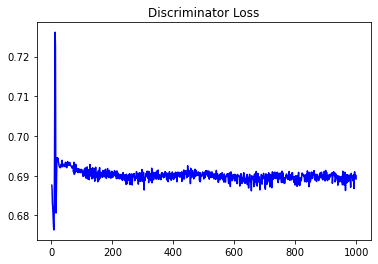

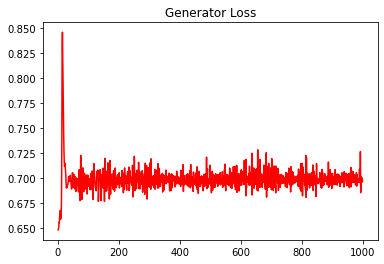

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.24642252553274463


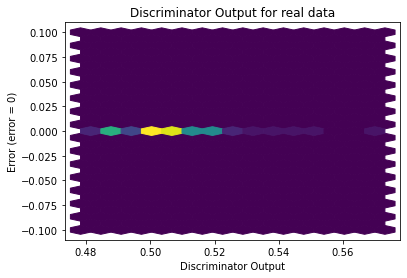

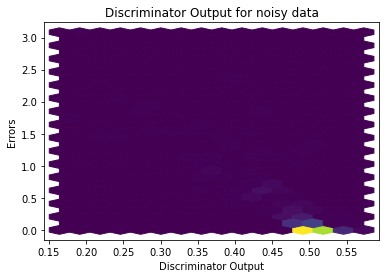

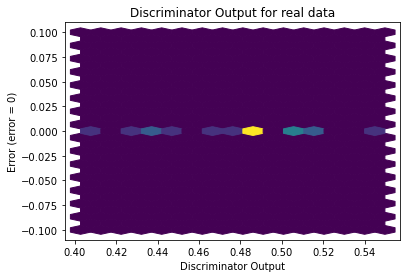

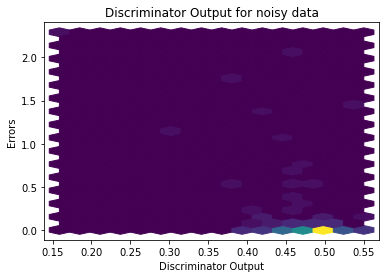

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


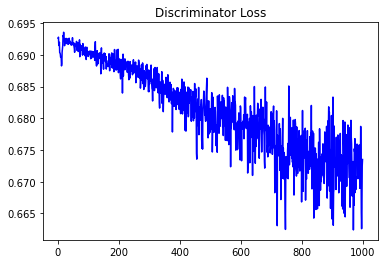

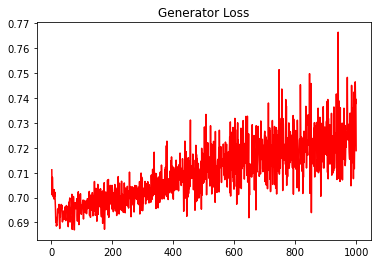

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2574989760213478


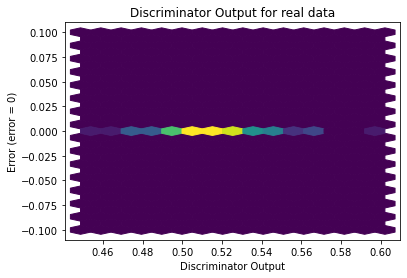

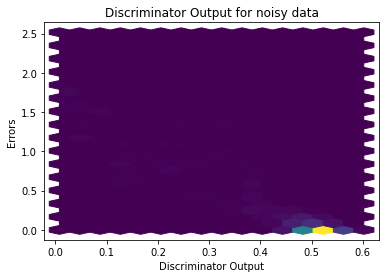

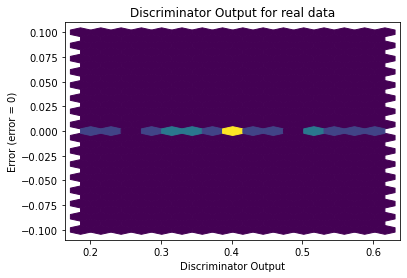

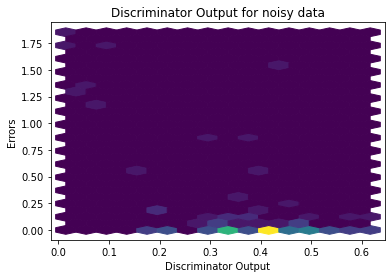

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2530]], requires_grad=True)
